# Arewa Data Science Academy
## Deep Learning Cohort2.0
**Name: Abdulazeez Ahmad**

**Email: azeezahmad518@gmail.com**

**Title: Week 4 Solution**


In [76]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.5.1+cu124


'cuda'

# 1. What are 3 areas in industry where computer vision is currently being used?

Computer vision is widely used across various industries. Here are three key areas where it is making a significant impact:  

1. **Healthcare** – Computer vision is used for medical image analysis, disease detection, and surgical assistance. Examples include detecting tumors in MRI scans, diagnosing retinal diseases from eye images, and assisting in robotic surgeries.  

2. **Automotive & Transportation** – Self-driving cars and advanced driver-assistance systems (ADAS) rely on computer vision for object detection, lane keeping, and collision avoidance. It is also used in traffic monitoring and pedestrian detection.  

3. **Retail & E-commerce** – Retailers use computer vision for cashier-less checkout systems (like Amazon Go), customer behavior analysis, and inventory management. It also powers visual search and recommendation systems in e-commerce.  


# 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting is a common issue in machine learning where a model learns the training data too well, including its noise and outliers, leading to poor performance on unseen data. This happens when the model becomes too complex and captures the random fluctuations in the training data rather than the underlying patterns

# 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.

1. **Cross-Validation:** Cross-validation involves splitting your dataset into multiple folds, training the model on different subsets, and evaluating its performance on the remaining data. This ensures that your model generalises well across different data splits. For example, in k-fold cross-validation, you divide your data into k subsets. You train and validate your model k times, using a different fold as the validation set and the remaining folds as the training set each time.
2. **Split Your Data:** For training, validation, and testing, divide your data into distinct subsets. This ensures that your model is trained on one subset, hyperparameters are tuned on another, and performance is evaluated on a completely separate set. For example, you could use an 80/10/10 split, with 80% of the data going to training, 10% going to validation, and 10% going to testing.
3. **Regularization:** Regularization techniques add penalty terms to the loss function to prevent the model from fitting the training data too closely. For example, in linear regression, L1 regularization (Lasso) adds the absolute values of the coefficients to the loss function, encouraging some coefficients to become exactly zero. L2 regularization (Ridge) augments the loss function with the squared coefficient values.

# 5. Load the torchvision.datasets.MNIST() train and test datasets.

In [77]:
import torchvision
from torchvision import datasets

from torchvision import transforms

In [78]:
# Getting the MNIST train dataset
train_data = datasets.MNIST(root=".",
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())

# Getting the MNIST test dataset
test_data = datasets.MNIST(root=".",
                           train=False,
                           download=True,
                           transform=transforms.ToTensor())

In [79]:
print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: ToTensor()
Test data:
Dataset MNIST
    Number of datapoints: 10000
    Root location: .
    Split: Test
    StandardTransform
Transform: ToTensor()


In [80]:
print(len(train_data))
print(len(test_data))

60000
10000


In [81]:
# See first training sample
image, label = train_data[0]
print(f"Image: {image}")
print(f"Label: {label}")

Image: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 

In [82]:
# checking out the shapes of our data
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Label shape: {label}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Label shape: 5


In [83]:
# Get the class names from the dataset
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

# 6. Visualize at least 5 different samples of the MNIST training dataset.

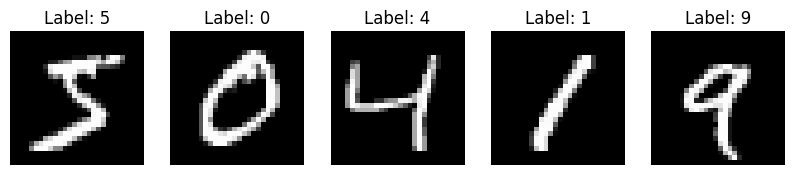

In [84]:
# Visualizing samples of the training dataset
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(10, 2))

for i in range(5):
    image, label = train_data[i]   # Get image and label
    axes[i].imshow(image.squeeze(), cmap="gray")  # Remove channel dimension
    axes[i].set_title(f"Label: {label}")
    axes[i].axis("off")

plt.show()

# 7. Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32

In [85]:
# Create train dataloader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

In [86]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79095796a8d0>,
 <torch.utils.data.dataloader.DataLoader at 0x790958e54ed0>)

In [87]:
for sample in next(iter(train_dataloader)):
  print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [88]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

# 8. Recreate model_2 used in notebook 03 (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [89]:
import torch
from torch import nn

class MNISTClassifier(nn.Module):
    """CNN model for MNIST digit classification."""
    def __init__(self, in_channels: int, num_filters: int, num_classes: int):
        super(MNISTClassifier, self).__init__()

        self.feature_extractor = nn.Sequential(
            nn.Conv2d(in_channels, num_filters, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(num_filters, num_filters, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(num_filters, num_filters, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(num_filters, num_filters, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(num_filters * 7 * 7, num_classes)
        )

    def forward(self, x):
        x = self.feature_extractor(x)
        return self.classifier(x)


In [90]:
model = MNISTClassifier(in_channels=1, num_filters=10, num_classes=10).to(device)
model

MNISTClassifier(
  (feature_extractor): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [91]:
# Try a dummy forward pass to see what shapes our data is
dummy_x = torch.rand(size=(1, 28, 28)).unsqueeze(dim=0).to(device)
# dummy_x.shape
model(dummy_x)

tensor([[ 0.0548,  0.0139,  0.0444,  0.0211,  0.0198, -0.0050, -0.0340, -0.0253,
          0.0241,  0.0454]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [92]:
dummy_x_2 = torch.rand(size=([1, 10, 7, 7]))
dummy_x_2.shape

torch.Size([1, 10, 7, 7])

# 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [93]:
%%time
from tqdm.auto import tqdm


# Train on CPU
model_cpu = MNISTClassifier(in_channels=1, num_filters=10, num_classes=10).to("cpu")

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

### Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_cpu.train()

        # Put data on CPU
        X, y = X.to("cpu"), y.to("cpu")

        # Forward pass
        y_pred = model_cpu(X)

        # Loss calculation
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Step the optimizer
        optimizer.step()

    # Adjust train loss for number of batches
    train_loss /= len(train_dataloader)

    ### Testing loop
    test_loss_total = 0

    # Put model in eval mode
    model_cpu.eval()

    # Turn on inference mode
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            # Make sure test data on CPU
            X_test, y_test = X_test.to("cpu"), y_test.to("cpu")
            test_pred = model_cpu(X_test)
            test_loss = loss_fn(test_pred, y_test)

            test_loss_total += test_loss.item()

        test_loss_total /= len(test_dataloader)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

# Train on GPU (if available)
if torch.cuda.is_available():
    print("\nTraining on GPU...\n")

    model_gpu = MNISTClassifier(in_channels=1, num_filters=10, num_classes=10).to("cuda")

    optimizer = torch.optim.SGD(model_gpu.parameters(), lr=0.1)

    for epoch in tqdm(range(epochs)):
        train_loss = 0
        for batch, (X, y) in enumerate(train_dataloader):
            model_gpu.train()

            # Put data on GPU
            X, y = X.to("cuda"), y.to("cuda")

            # Forward pass
            y_pred = model_gpu(X)

            # Loss calculation
            loss = loss_fn(y_pred, y)
            train_loss += loss.item()

            # Optimizer zero grad
            optimizer.zero_grad()

            # Loss backward
            loss.backward()

            # Step the optimizer
            optimizer.step()

        train_loss /= len(train_dataloader)

        ### Testing loop
        test_loss_total = 0

        model_gpu.eval()
        with torch.inference_mode():
            for batch, (X_test, y_test) in enumerate(test_dataloader):
                X_test, y_test = X_test.to("cuda"), y_test.to("cuda")
                test_pred = model_gpu(X_test)
                test_loss = loss_fn(test_pred, y_test)

                test_loss_total += test_loss.item()

            test_loss_total /= len(test_dataloader)

        print(f"Epoch: {epoch+1} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

else:
    print("CUDA is not available. Skipping GPU training.")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | Loss: 0.353 | Test loss: 0.104
Epoch: 2 | Loss: 0.079 | Test loss: 0.064
Epoch: 3 | Loss: 0.061 | Test loss: 0.048
Epoch: 4 | Loss: 0.052 | Test loss: 0.046
Epoch: 5 | Loss: 0.044 | Test loss: 0.039

Training on GPU...



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | Loss: 0.397 | Test loss: 0.114
Epoch: 2 | Loss: 0.099 | Test loss: 0.068
Epoch: 3 | Loss: 0.077 | Test loss: 0.060
Epoch: 4 | Loss: 0.067 | Test loss: 0.053
Epoch: 5 | Loss: 0.061 | Test loss: 0.050
CPU times: user 4min 29s, sys: 747 ms, total: 4min 29s
Wall time: 4min 33s


In [94]:
%%time
device = "cuda" if torch.cuda.is_available() else "cpu"

# Train on GPU
model_gpu = MNISTClassifier(in_channels=1,
                            num_filters=10,
                            num_classes=10).to(device)

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_gpu.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
    train_loss = 0
    model_gpu.train()
    for batch, (X, y) in enumerate(train_dataloader):
        # Move data to device
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model_gpu(X)

        # Compute loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()  # Convert loss to scalar

        # Zero gradients
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # Update weights
        optimizer.step()

    # Compute average training loss
    train_loss /= len(train_dataloader)

    ### Testing loop
    test_loss_total = 0
    model_gpu.eval()
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            # Move test data to device
            X_test, y_test = X_test.to(device), y_test.to(device)

            # Forward pass
            test_pred = model_gpu(X_test)
            test_loss = loss_fn(test_pred, y_test)

            test_loss_total += test_loss.item()  # Convert test loss to scalar

        # Compute average test loss
        test_loss_total /= len(test_dataloader)

    # Print results
    print(f"Epoch: {epoch+1} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | Loss: 0.295 | Test loss: 0.081
Epoch: 2 | Loss: 0.079 | Test loss: 0.059
Epoch: 3 | Loss: 0.060 | Test loss: 0.050
Epoch: 4 | Loss: 0.051 | Test loss: 0.046
Epoch: 5 | Loss: 0.045 | Test loss: 0.045
CPU times: user 54.6 s, sys: 380 ms, total: 55 s
Wall time: 55.4 s


# 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

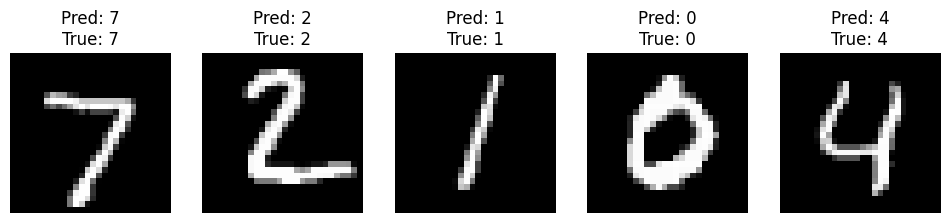

In [95]:
# Select 5 random test samples
num_samples = 5
model_gpu.eval()  # Set model to evaluation mode

# Get a batch of test data
X_test_batch, y_test_batch = next(iter(test_dataloader))

# Move test batch to device
X_test_batch, y_test_batch = X_test_batch[:num_samples].to(device), y_test_batch[:num_samples].to(device)

# Make predictions
with torch.inference_mode():
    y_pred_logits = model_gpu(X_test_batch)
    y_pred_labels = torch.argmax(y_pred_logits, dim=1)  # Convert logits to predicted labels

# Plot the results
fig, axes = plt.subplots(1, num_samples, figsize=(12, 4))
for i in range(num_samples):
    axes[i].imshow(X_test_batch[i].cpu().squeeze(), cmap="gray")  # Convert tensor to NumPy for plotting
    axes[i].set_title(f"Pred: {y_pred_labels[i].item()}\nTrue: {y_test_batch[i].item()}")
    axes[i].axis("off")

plt.show()


# 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

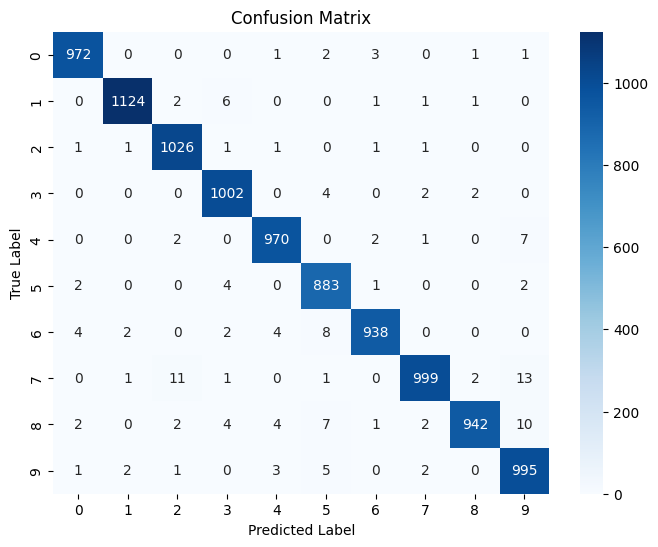

In [96]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Put model in evaluation mode
model_gpu.eval()

# Collect all predictions and true labels
all_preds = []
all_labels = []

with torch.inference_mode():
    for X_batch, y_batch in test_dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        y_pred_logits = model_gpu(X_batch)
        y_pred_labels = torch.argmax(y_pred_logits, dim=1)

        all_preds.extend(y_pred_labels.cpu().numpy())  # Move to CPU & convert to numpy
        all_labels.extend(y_batch.cpu().numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


12. Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?

In [97]:
# Create a random tensor with shape [1, 3, 64, 64]
random_tensor = torch.rand(1, 3, 64, 64)

# Test different kernel sizes
kernel_sizes = [1, 3, 5, 7, 9]  # Different kernel sizes to experiment with

for k in kernel_sizes:
    conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=k, stride=1, padding=0)
    output = conv_layer(random_tensor)
    print(f"Kernel size: {k} | Output shape: {output.shape}")


Kernel size: 1 | Output shape: torch.Size([1, 10, 64, 64])
Kernel size: 3 | Output shape: torch.Size([1, 10, 62, 62])
Kernel size: 5 | Output shape: torch.Size([1, 10, 60, 60])
Kernel size: 7 | Output shape: torch.Size([1, 10, 58, 58])
Kernel size: 9 | Output shape: torch.Size([1, 10, 56, 56])


**Observation**: As kernel increases, the output spacial size decreases.

# 13. Use a model similar to the trained model_2 from notebook 03 to make predictions on the test torchvision.datasets.FashionMNIST dataset.

In [98]:

# Download FashionMNIST train & test
from torchvision import datasets
from torchvision import transforms

fashion_mnist_train = datasets.FashionMNIST(root=".",
                                            download=True,
                                            train=True,
                                            transform=transforms.ToTensor())

fashion_mnist_test = datasets.FashionMNIST(root=".",
                                           train=False,
                                           download=True,
                                           transform=transforms.ToTensor())

len(fashion_mnist_train), len(fashion_mnist_test)

(60000, 10000)

In [99]:
# Get the class names of the Fashion MNIST dataset
fashion_mnist_class_names = fashion_mnist_train.classes
fashion_mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [100]:
# Turn FashionMNIST datasets into dataloaders
from torch.utils.data import DataLoader

fashion_mnist_train_dataloader = DataLoader(fashion_mnist_train,
                                            batch_size=32,
                                            shuffle=True)

fashion_mnist_test_dataloader = DataLoader(fashion_mnist_test,
                                           batch_size=32,
                                           shuffle=False)

len(fashion_mnist_train_dataloader), len(fashion_mnist_test_dataloader)

(1875, 313)

In [101]:
# model_2 is the same architecture as MNISTClassifier
model_2 = MNISTClassifier(in_channels=1,
                            num_filters=10,
                            num_classes=10).to(device)

model_2

MNISTClassifier(
  (feature_extractor): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [102]:
# Setup loss and optimizer
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [104]:
# Setup metrics
from tqdm.auto import tqdm
from torchmetrics import Accuracy

acc_fn = Accuracy(task = 'multiclass', num_classes=len(fashion_mnist_class_names)).to(device)

# Setup training/testing loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss, test_loss_total = 0, 0
  train_acc, test_acc = 0, 0

  ### Training
  model_2.train()
  for batch, (X_train, y_train) in enumerate(fashion_mnist_train_dataloader):
    X_train, y_train = X_train.to(device), y_train.to(device)

    # Forward pass and loss
    y_pred = model_2(X_train)
    loss = loss_fn(y_pred, y_train)
    train_loss += loss
    train_acc += acc_fn(y_pred, y_train)

    # Backprop and gradient descent
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # Adjust the loss/acc (find the loss/acc per epoch)
  train_loss /= len(fashion_mnist_train_dataloader)
  train_acc /= len(fashion_mnist_train_dataloader)

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(fashion_mnist_test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)

      # Forward pass and loss
      y_pred_test = model_2(X_test)
      test_loss = loss_fn(y_pred_test, y_test)
      test_loss_total += test_loss

      test_acc += acc_fn(y_pred_test, y_test)

    # Adjust the loss/acc (find the loss/acc per epoch)
    test_loss /= len(fashion_mnist_test_dataloader)
    test_acc /= len(fashion_mnist_test_dataloader)

  # Print out what's happening
  print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc: {train_acc:.2f} | Test loss: {test_loss_total:.3f} | Test acc: {test_acc:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.844 | Train acc: 0.33 | Test loss: 219.808 | Test acc: 0.77
Epoch: 1 | Train loss: 0.544 | Train acc: 0.80 | Test loss: 151.258 | Test acc: 0.83
Epoch: 2 | Train loss: 0.446 | Train acc: 0.84 | Test loss: 135.245 | Test acc: 0.84
Epoch: 3 | Train loss: 0.401 | Train acc: 0.86 | Test loss: 124.255 | Test acc: 0.86
Epoch: 4 | Train loss: 0.372 | Train acc: 0.87 | Test loss: 120.394 | Test acc: 0.86


In [105]:
# Make predictions with trained model_2
test_preds = []
model_2.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(fashion_mnist_test_dataloader):
    y_logits = model_2(X_test.to(device))
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_probs, dim=1)
    test_preds.append(y_pred_labels)
test_preds = torch.cat(test_preds).cpu() # matplotlib likes CPU
test_preds[:10], len(test_preds)

  0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

In [106]:
# Get wrong prediction indexes
wrong_pred_indexes = np.where(test_preds != fashion_mnist_test.targets)[0]
len(wrong_pred_indexes)

1380

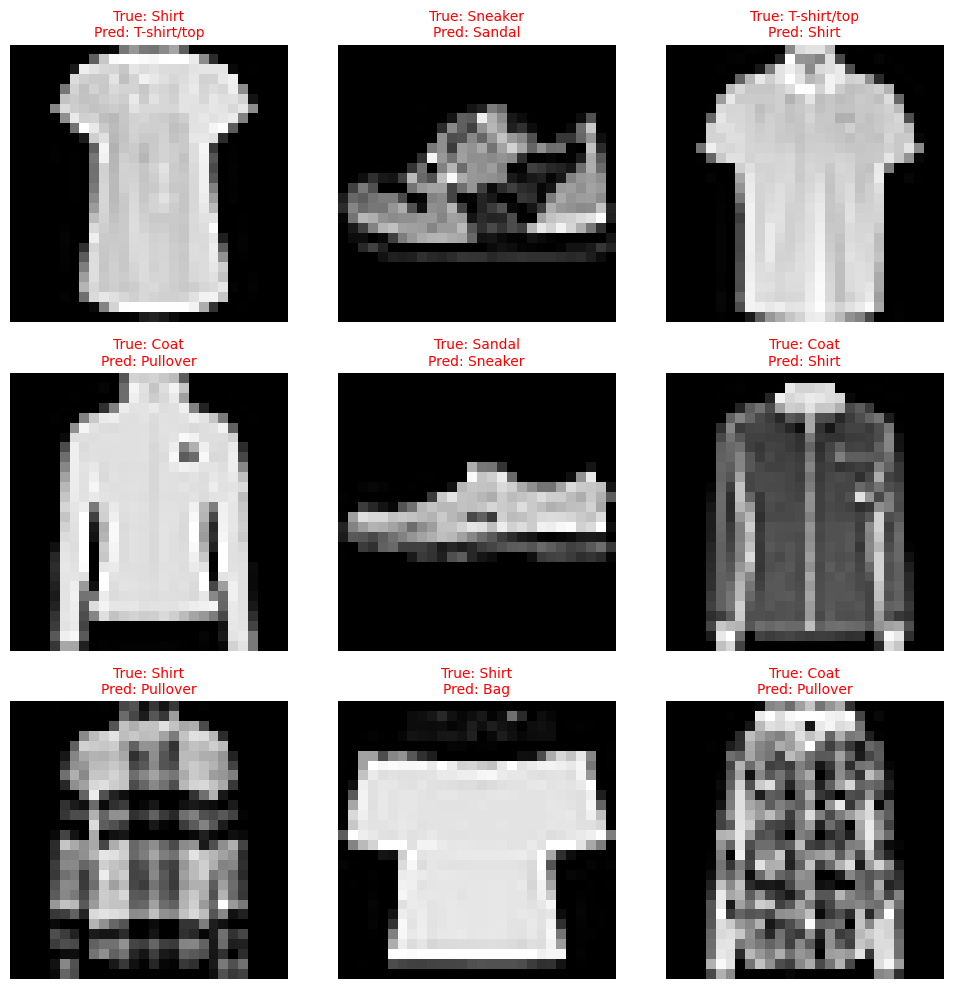

In [107]:
import random

# Ensure wrong_pred_indexes is a list
wrong_pred_list = list(wrong_pred_indexes)

# Select 9 random incorrect predictions
random_wrong_preds = random.sample(wrong_pred_list, k=9)

# Set up the figure
plt.figure(figsize=(10, 10))

for i, idx in enumerate(random_wrong_preds):
    true_label = fashion_mnist_class_names[fashion_mnist_test[idx][1]]
    pred_label = fashion_mnist_class_names[test_preds[idx]]

    plt.subplot(3, 3, i + 1)
    plt.imshow(fashion_mnist_test[idx][0].squeeze(), cmap="gray")
    plt.title(f"True: {true_label}\nPred: {pred_label}", color="red", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()
